# Imports

In [35]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
import itertools
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initializing the exchange economy object

In [36]:
from ExchangeEconomy import ExchangeEconomyClass
model = ExchangeEconomyClass()

# Question 1

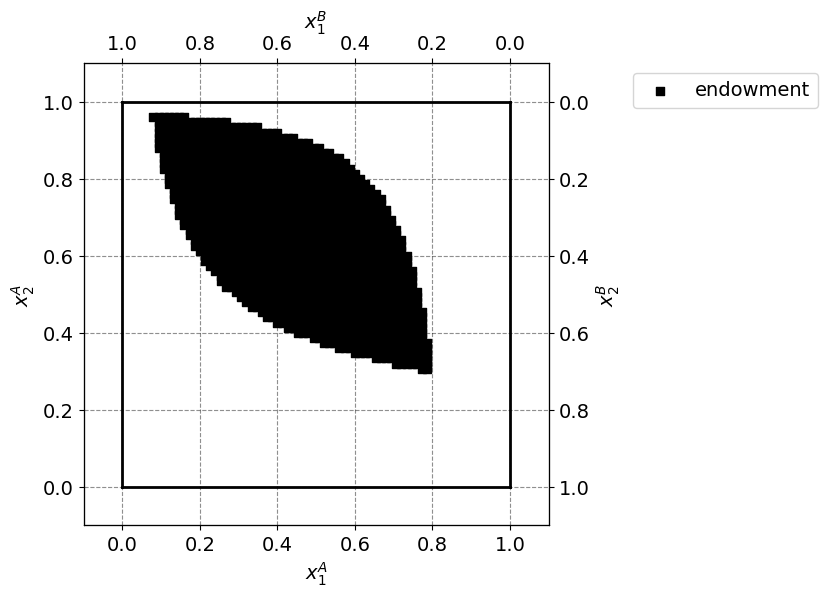

In [37]:
# Import itertools to use product function
import itertools

# 2. Defining x1A and x2A
x1A_list = [i * 1/75 for i in range(76)]
x2A_list = [i * 1/75 for i in range(76)]

# 3. Create a list of all combinations of x1A_list and x2A_list
xA_combinations = list(itertools.product(x1A_list, x2A_list))

# 4. Array for the combinations of x1A and x2A that are Pareto improvements
pareto_combinations = []

# 5. Looping through all combinations of x1A, x2A, x1B and x2B
for (x1A, x2A) in xA_combinations:
    x1B = 1 - x1A
    x2B = 1 - x2A

    if model.utility_A(x1A, x2A) >= model.utility_A(model.par.w1A, model.par.w2A) and model.utility_B(x1B, x2B) >= model.utility_B(model.par.w1B, model.par.w2B):
        pareto_combinations.append((x1A, x2A))

# 6. Seperating Pareto improvement combinations into two seperate arrays for them to be plotted
x1A_pareto = [x[0] for x in pareto_combinations]
x2A_pareto = [x[1] for x in pareto_combinations]

# 7. Edgeworth Plot
# 7.1. Import graph helper
from GraphHelper import create_edgeworth_plot

# 7.2. Initializing plot
edgeworth_plot_1 = create_edgeworth_plot()

# 7.3. Adding datapoints to the Edgeworth box
edgeworth_plot_1.scatter(x1A_pareto, x2A_pareto, marker='s', color='black', label='endowment')
edgeworth_plot_1.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2

In [38]:
# 1. Defining p1
p1 = [(0.5 + 2*i/75) for i in range(76)]

# 2. Calculate the errors
errors = [model.check_market_clearing(x) for x in p1]
eps1 = [x[0] for x in errors]
eps2 = [x[1] for x in errors]

# 3. Import pandas to create dataframes
import pandas as pd

# 4. Create DataFrame with errors and print it
df = pd.DataFrame(errors, columns=['eps1', 'eps2'])
print(df)

        eps1      eps2
0   0.533333 -0.266667
1   0.475949 -0.250667
2   0.424096 -0.234667
3   0.377011 -0.218667
4   0.334066 -0.202667
..       ...       ...
71 -0.363231  0.869333
72 -0.365840  0.885333
73 -0.368392  0.901333
74 -0.370889  0.917333
75 -0.373333  0.933333

[76 rows x 2 columns]


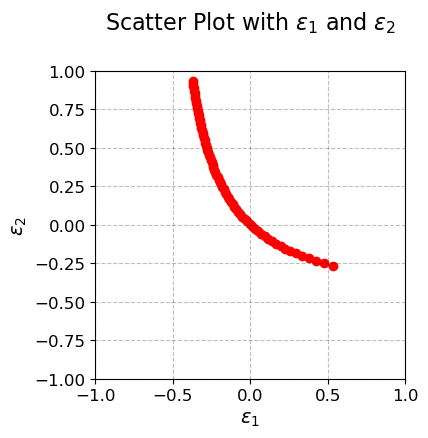

In [39]:
# 5. Create small scatter plot for the errors
plt.figure(figsize=(4, 4))

# 5.1. Customizing plot
plt.scatter(eps1, eps2, color='red')
plt.title('Scatter Plot with $\epsilon_1$ and $\epsilon_2$', fontsize=16, pad=30)
plt.xlabel('$ \epsilon_1 $', fontsize=14)
plt.ylabel('$ \epsilon_2 $', fontsize=14)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)

# 5.2. Show plot
plt.show()

# Question 3

In [40]:
# 1. Importing numpy
import numpy as np

# 2. Finding the index of the value that is closest to zero in the eps1 list
index_closest_to_zero = np.abs(eps1).argmin()

# 3. Getting the price where eps1 is closest to zero
market_clearing_price = p1[index_closest_to_zero]

# 4. Demand from consumer A and B at the market clearing price
demand_A_3 = model.demand_A(market_clearing_price)
demand_B_3 = model.demand_B(market_clearing_price)

# 4. Print the market clearing price
print(f"The market clearing price is when p1 is {market_clearing_price} and p2 is 1.")
print(f"At the market clearing price consumer A demands {demand_A_3[0]} of good 1 and {demand_A_3[1]} of good 2, meanwhile consumer B demands {demand_B_3[0]} of good 1 and {demand_B_3[1]} of good 2")


The market clearing price is when p1 is 0.9533333333333334 and p2 is 1.
At the market clearing price consumer A demands 0.3715617715617715 of good 1 and 0.7084444444444445 of good 2, meanwhile consumer B demands 0.6228438228438227 of good 1 and 0.2968888888888889 of good 2


We know that the price above is the market clearing price, since Walras' law state that if one market clears, the other one does as well. We could also have checked which of the eps2's was closest to zero in order to find the market clearing price, but we would have gotten the same result.

# Question 4

## Question 4.a

Optimizing consumer A's utility from the p1 prices in the list p1.

In [41]:
# 1. Finding consumer B's demand for goods 1 and 2 at the prices in p1
demand_b_list = [model.demand_B(x) for x in p1]

# 2. Calculating consumer A's utility at the demand levels calculated above
utility_a_list = [model.utility_A(1 - x[0], 1 - x[1]).real for x in demand_b_list]

# 3. Finding consumer A's largest utility 
max_utility_a = max(utility_a_list)

# 4. Finding the index of consumer A's largest utility
index_max_util_a = utility_a_list.index(max_utility_a)

# 5. Finding the optimal p1
max_util_p1 = p1[index_max_util_a]

# 6. Finding each consumers optimal demand
consumer_b_good_1 = demand_b_list[index_max_util_a][0]
consumer_b_good_2 = demand_b_list[index_max_util_a][1]
consumer_a_good_1 = 1 - consumer_b_good_1
consumer_a_good_2 = 1 - consumer_b_good_2

# 7. Printing the results
print(f"The max utility for consumer A when only being able to choose prices in p1 is {max_utility_a}.")
print(f"This level of utility is achieved when the price for good 1 is {max_util_p1} and the price for good 2 is 1.")
print(f"At the prices above consumer B will demand {consumer_b_good_1} of good 1 and {consumer_b_good_2} of good 2, which will make consumer A demand {consumer_a_good_1} of good 1 and {consumer_a_good_2} of good 2.")

The max utility for consumer A when only being able to choose prices in p1 is 0.633615985237553.
This level of utility is achieved when the price for good 1 is 1.8866666666666667 and the price for good 2 is 1.
At the prices above consumer B will demand 0.38068315665488806 of good 1 and 0.3591111111111111 of good 2, which will make consumer A demand 0.619316843345112 of good 1 and 0.6408888888888888 of good 2.


## Question 4.b

Optimizing consumer A's utility from the p1 prices larger than 0.

In [42]:
# 1. Setting up an objective function to minimize
def negative_util_A(p1):

    x1B,x2B = model.demand_B(p1)
    
    x1A = 1 - x1B
    x2A = 1 - x2B

    return -model.utility_A(x1A, x2A)

# 2. Importing the minimize_scalar function
from scipy.optimize import minimize_scalar

# 3. Call the optimization function with the constraint
# The bounds have been limited to be between 0 and 10 since the minimize_scalar function times out if a larger bounds is to be searched.
result = minimize_scalar(negative_util_A, bounds=(0, 10), method='bounded')

# Create the allocation as global variables so the results can be accessed later
consumer_a_good_1_4b = 0
consumer_a_good_2_4b = 0

# 4. Print the result
if result.success:
    
    # 4.1 Optimal utility for consumer A and price p1
    max_utility_a = -result.fun
    max_util_p1 = result.x

    # 4.2 Finding each consumers optimal demand
    consumer_b_good_1, consumer_b_good_2 = model.demand_B(max_util_p1)
    consumer_a_good_1_4b = 1 - consumer_b_good_1
    consumer_a_good_2_4b = 1 - consumer_b_good_2

    print(f"The max utility for consumer A when only being able to chose prices in p1 is {max_utility_a}.")
    print(f"This level of utility is achieved when the price for good 1 is {max_util_p1} and the price for good 2 is 1.")
    print(f"At the prices above consumer B will demand {consumer_b_good_1} of good 1 and {consumer_b_good_2} of good 2, which will make consumer A demand {consumer_a_good_1_4b} of good 1 and {consumer_a_good_2_4b} of good 2.")
else:
    print("Optimization failed:", result.message)


The max utility for consumer A when only being able to chose prices in p1 is 0.6336208506935825.
This level of utility is achieved when the price for good 1 is 1.899344670305824 and the price for good 2 is 1.
At the prices above consumer B will demand 0.3790321124767344 of good 1 and 0.3599563113537216 of good 2, which will make consumer A demand 0.6209678875232656 of good 1 and 0.6400436886462784 of good 2.


# Question 5

## Question 5.a

In [43]:
# 1. Reusing the variable called pareto_combinations, which is the could also be called C
utility_A_5a = [model.utility_A(x[0], x[1]) for x in pareto_combinations]

# 2. Finding consumer A's largest utility 
max_utility_A_5a = max(utility_A_5a)

# 3. Finding the index of consumer A's largest utility
index_max_util_A_5a = utility_A_5a.index(max_utility_A_5a)

# 4. Getting the combination of x1A and x2A that creates the highest utility
highest_utility_5a = pareto_combinations[index_max_util_A_5a]

# 5. Print results
print(f"The max utility for consumer A when only being able to pick combinations in C (pareto_combinations) is {highest_utility_5a}.")
print(f"The max utility for consumer A is achieved when having {highest_utility_5a[0]} of good 1 and {highest_utility_5a[1]} of good 2.")

The max utility for consumer A when only being able to pick combinations in C (pareto_combinations) is (0.56, 0.8533333333333334).
The max utility for consumer A is achieved when having 0.56 of good 1 and 0.8533333333333334 of good 2.


## Question 5.b

In [44]:
# 1. Creating the set x1A,x2A in [0,1] x [0,1]
# The larger the detail_level variable is the more precise the allocations are going to be
detail_level = 75
x1A_5b = [i * 1/detail_level for i in range(detail_level+1)]
x2A_5b = [i * 1/detail_level for i in range(detail_level+1)]

# 2. Create a list of all combinations of x1A_new and x2A_new
xA_combinations_5b = list(itertools.product(x1A_5b, x2A_5b))

# 3. Appending the combinations where uB(allocation) >= uB(endowment)
restricted_combinations = []

for (x1A, x2A) in xA_combinations_5b:
    x1B = 1 - x1A
    x2B = 1 - x2A

    if model.utility_B(1 - x1A, 1 - x2A) >= model.utility_B(model.par.w1B, model.par.w2B):
        restricted_combinations.append((x1A, x2A))

# 4. Find the allocation in restricted_combinations with the largest utility
utility_A_5b = [model.utility_A(x[0], x[1]) for x in restricted_combinations]

# 5. Finding consumer A's largest utility
max_utility_A_5b = max(utility_A_5b)

# 6. Finding the index of consumer A's largest utility
index_max_util_A_5b = utility_A_5b.index(max_utility_A_5b)

# 7. Getting the combination of x1A and x2A that creates the highest utility
highest_utility_5b = restricted_combinations[index_max_util_A_5b]

# 8. Print results
print(f"The max utility for consumer A when only being able to pick combinations in xA_combinations_5b is {highest_utility_5b}.")
print(f"The max utility for consumer A is achieved when having {highest_utility_5b[0]} of good 1 and {highest_utility_5b[1]} of good 2.")

The max utility for consumer A when only being able to pick combinations in xA_combinations_5b is (0.56, 0.8533333333333334).
The max utility for consumer A is achieved when having 0.56 of good 1 and 0.8533333333333334 of good 2.


# Question 6

## Question 6.a

In [45]:
# 1. Create a list of all combinations of x1A_5b and x2A_5b
xA_combinations_6a = list(itertools.product(x1A_5b, x2A_5b))

# 2. Find the allocation in xA_combinations_6a with the largest sum of utilities
sum_utilities_6a = [model.utility_A(x[0], x[1]) + model.utility_B(1 - x[0], 1 - x[1]) for x in xA_combinations_6a]

# 3. Finding the largest sum of utilities
max_sum_utilities_6a = max(sum_utilities_6a)

# 4. Finding the index of the largest sum of utilities
index_max_sum_utilities_6a = sum_utilities_6a.index(max_sum_utilities_6a)

# 5. Getting the combination of x1A and x2A that creates the highest sum of utilities
highest_sum_utilities_6a = xA_combinations_6a[index_max_sum_utilities_6a]

# 6. Print results
print(f"The allocation that maximizes the sum of utilities u^a + u^b is {highest_sum_utilities_6a}.")
print(f"The max sum of utilities is achieved when consumer A has {highest_sum_utilities_6a[0]} of good 1 and {highest_sum_utilities_6a[1]} of good 2.")
print(f"which means consumer B has {round(1 - highest_sum_utilities_6a[0], 2)} of good 1 and {round(1 - highest_sum_utilities_6a[1], 2)} of good 2.")


The allocation that maximizes the sum of utilities u^a + u^b is (0.3333333333333333, 0.6666666666666666).
The max sum of utilities is achieved when consumer A has 0.3333333333333333 of good 1 and 0.6666666666666666 of good 2.
which means consumer B has 0.67 of good 1 and 0.33 of good 2.


## Question 6.b

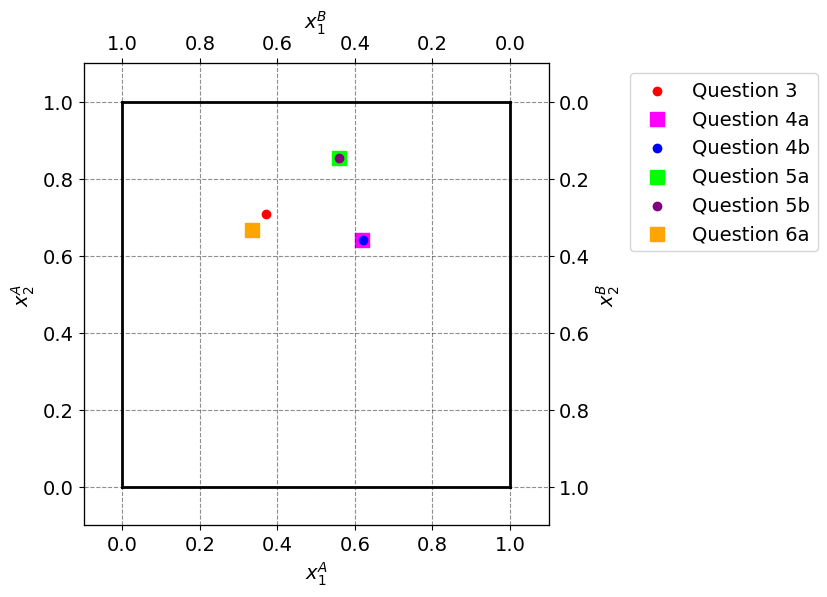

In [46]:
# 1. Defining consumer A's demand for goods 1 and 2 at market clearing for the previous questions
allocation_3 = demand_A_3
allocation_4a = (consumer_a_good_1, consumer_a_good_2)
allocation_4b = (consumer_a_good_1_4b, consumer_a_good_2_4b)
allocation_5a = pareto_combinations[index_max_util_A_5a]
allocation_5b = restricted_combinations[index_max_util_A_5b]
allocation_6a = highest_sum_utilities_6a

# 2. Plot the allocations in the Edgeworth plot
edgeworth_plot_6b = create_edgeworth_plot()

# 4.3. Adding datapoints to the Edgeworth box
edgeworth_plot_6b.scatter(allocation_3[0], allocation_3[1], marker='o', color='red', label='Question 3')
edgeworth_plot_6b.scatter(allocation_4a[0], allocation_4a[1], marker='s', color='Magenta', label='Question 4a', s = 100)
edgeworth_plot_6b.scatter(allocation_4b[0], allocation_4b[1], marker='o', color='blue', label='Question 4b')
edgeworth_plot_6b.scatter(allocation_5a[0], allocation_5a[1], marker='s', color='lime', label='Question 5a', s = 100)
edgeworth_plot_6b.scatter(allocation_5b[0], allocation_5b[1], marker='o', color='purple', label='Question 5b')
edgeworth_plot_6b.scatter(allocation_6a[0], allocation_6a[1], marker='s', color='orange', label='Question 6a', s = 100)
edgeworth_plot_6b.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

The size of the points in the edgeworth plot above don't have any analytical meaning, they're just made bigger two see both points where there is an overlap.


**Social optimum (Question 6a + 3)**

In question 6a we've been told to find the social optimum, which maximizes utility for both consumers. In question 3 we've been told to find the allocation that satisfies the market clearing condition. This means that the social optimum is not far off from what satisfies the market clearing condition.

**Difference between $p_1 \in \Rho_1$ and $p_1>0$ (Question 4a + 4b)**

The allocations from question 4a and 4b also overlap, where the major difference between the two allocation is that in 4a we're only able to pick prices in the set $\Rho_1$, but in 4b it's possible to pick any price that is $p_1>0$. Thereby we can conclude that almost the same price will be picked since everything else is equal in maximization problem.


**xxx (Question 5a + 5b)**
We can also see that the allocations for question 5a and 5b


# Question 7

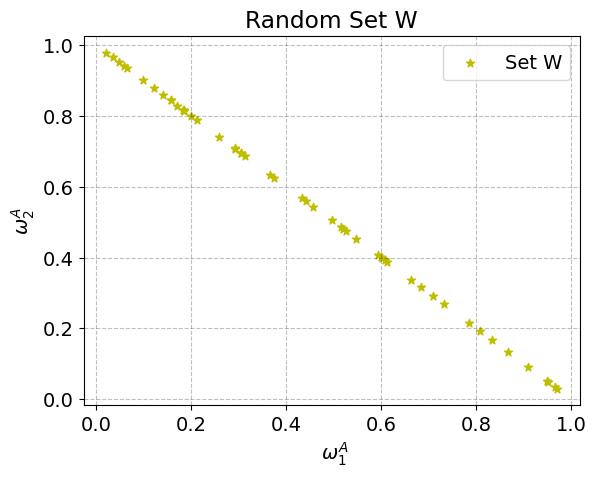

In [47]:
# 1. Set seed for reproducibility
np.random.seed(42)

# 2. Generate 50 random elements for W
num_elements = 50
random_np = np.random.rand(num_elements, 1)
random_list = random_np.tolist()

# 3. Creating the list W with endowments
W = [(x[0], 1 - x[0]) for x in random_list]

# 4. Seperating the list with touples so it can be plotted
w1_endowment = [x[0] for x in W]
w2_endowment = [x[1] for x in W]

# 5. Plot the set W
plt.scatter(w1_endowment, w2_endowment, label='Set W', marker='*', color='y')

# 6. Add labels and legend
plt.xlabel(' $ \omega_{1}^{A} $')
plt.ylabel('$ \omega_{2}^{A} $')
plt.title('Random Set W')
plt.legend()

# 7. Show the plot
plt.show()


# Question 8

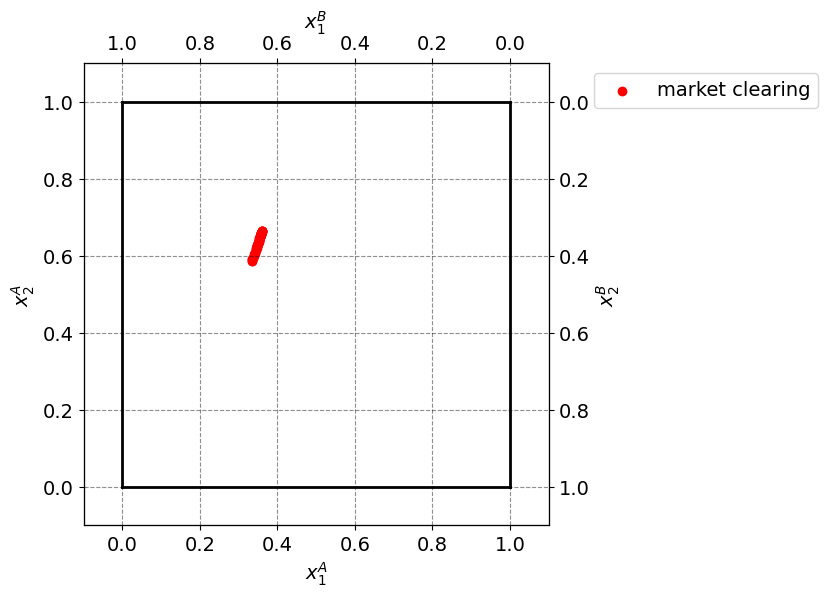

In [48]:
# 1. Initialize the model economy
model = ExchangeEconomyClass()

# 2. Create array to store market clearing allocations of x1A and x2A
market_clearing_combinations = []

# 3. Loop through endowments and find the market clearing combination for each endowment
for endowment in W:

    # 3.1 Setting the endowments in the model
    model.par.w1A = endowment[0]
    model.par.w2A = endowment[1]

    # 3.2 Calling the custom implemented find_market_clearing function
    (price, x1A, x2A, x1B, x2B) = model.find_market_clearing()

    # 3.3 Add the market clearing combination to the market_clearing_combinations array
    market_clearing_combinations += [(x1A, x2A)]

# 4. Setup the edgeworth plot

# 4.1. Initializing plot
edgeworth_plot_8 = create_edgeworth_plot()

# 4.2. Seperating the market clearing combinations into two lists for them to be plotted
x1A_8 = [x[0] for x in market_clearing_combinations]
x2A_8 = [x[1] for x in market_clearing_combinations]

# 4.3. Adding datapoints to the Edgeworth box
edgeworth_plot_8.scatter(x1A_8, x2A_8, marker='o', color='red', label='market clearing')
edgeworth_plot_8.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));


The plot above is an edgeworth plot with the market clearing combinations for consumer A and B which have been found from randomly generated endowments.